In [335]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import BatchNormalization, Activation

In [336]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import re

%matplotlib inline
rcParams['figure.figsize'] = 10,8

In [337]:
df_train = pd.read_csv("train.csv", index_col='PassengerId')
df_test = pd.read_csv("test.csv", index_col='PassengerId')
# df_train['is_train'] = True
# df_test['is_train'] = False
# y_train = pd.get_dummies(df_train['Survived'])
# df_train = df_train.drop('Survived', axis=1)

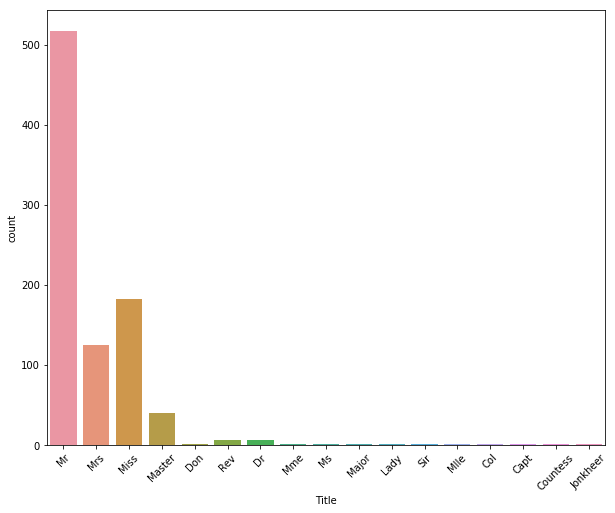

In [338]:
# df_all = pd.concat([df_train, df_test], axis=0)
# print(df_train.info())
# print(df_test.info())
# print(df_train.describe())
df_train['Name'].head()
df_train['Title'] = df_train.Name.apply(lambda x: re.search(
    ' ([A-Z][a-z]+)\.', x).group(1))# to find Mr., Mrs., Dr.; [(Mr).] 
# df_train['Title'].head()
sns.countplot(x='Title', data=df_train)
plt.xticks(rotation=45)
plt.show()

In [339]:
df_test['Title'] = df_test.Name.apply(lambda x: re.search('([A-Z][a-z]+)\.', x).group(1))

In [340]:
# Map name data to title
Title_Dictionary = {
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Master': 'Master',
    'Don': 'Royalty',
    'Rev': 'Officer',
    'Dr': 'Officer',
    'Mme': 'Mrs',
    'Major': 'Officer',
    'Lady': 'Royalty',
    'Sir': 'Royalty',
    'Mlle': 'Miss',
    'Col': 'Officer',
    'Capt': 'Officer',
    'Countess': 'Royalty',
    'Jonkheer': 'Royalty'
}
df_train['Title'] = df_train.Title.map(Title_Dictionary)
df_test['Title'] = df_test.Title.map(Title_Dictionary)

Title
Master     0.575000
Miss       0.701087
Mr         0.156673
Mrs        0.793651
Officer    0.277778
Royalty    0.600000
Name: Survived, dtype: float64


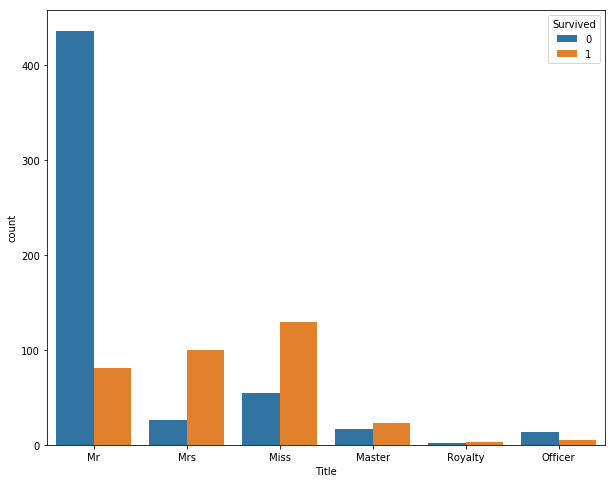

In [341]:
# find the survived distribution on title
print(df_train.groupby('Title')['Survived'].mean())
sns.countplot(x='Title', data=df_train, hue='Survived')
plt.show()

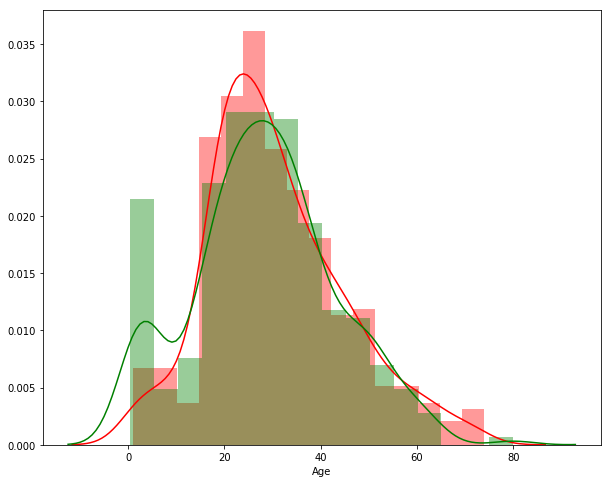

In [342]:
age_high_zero_died = df_train[(df_train['Age']>0)&
                              (df_train['Survived']==0)]
age_high_zero_surv = df_train[(df_train['Age']>0)&
                             (df_train['Survived']==1)]
sns.distplot(age_high_zero_died['Age'], color='r')
sns.distplot(age_high_zero_surv['Age'], color='g')
plt.show()

In [343]:
# find missing age
age_group = df_train.groupby(['Sex', 'Pclass', 'Title'])['Age']
# print(age_group.median())
df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.groupby(['Sex',
                                                               'Pclass', 
                                                              'Title']).Age.transform('median')
print(df_train['Age'].isnull().sum())
print(df_test.Title[df_test.Title=='Royalty'])

0
Series([], Name: Title, dtype: object)


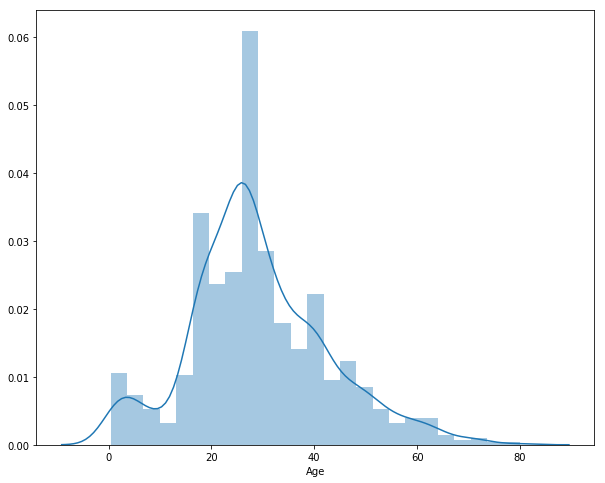

In [344]:
sns.distplot(df_train['Age'])
plt.show()

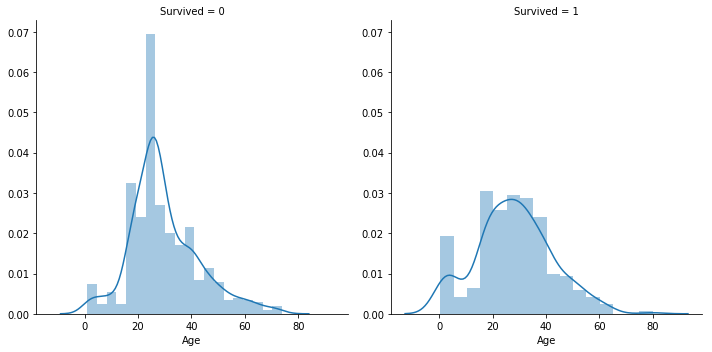

In [345]:
# Age v.s. Survived or not
g = sns.FacetGrid(df_train, col='Survived', size=5)
g = g.map(sns.distplot, 'Age')
plt.show()

In [346]:
interval = (0,5,12,18,25,35,60,120)
cats = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']
df_train['Age_cat'] = pd.cut(df_train.Age, interval, labels=cats)
df_train['Age_cat'].head()
df_test['Age_cat'] = pd.cut(df_test.Age, interval, labels=cats)
df_test['Age_cat'].head()

PassengerId
892      Young
893      Adult
894     Senior
895      Young
896    Student
Name: Age_cat, dtype: category
Categories (7, object): [babies < Children < Teen < Student < Young < Adult < Senior]

Survived    0   1
Age_cat          
babies     15  33
Children   16   9
Teen       54  49
Student   108  56
Young     206  99
Adult     133  91
Senior     17   5


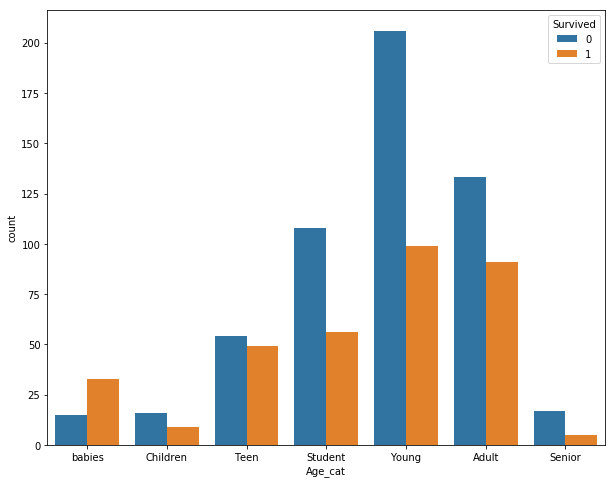

In [347]:
print(pd.crosstab(df_train.Age_cat, df_train.Survived))
sns.countplot(x='Age_cat', data=df_train, hue='Survived')
plt.show()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


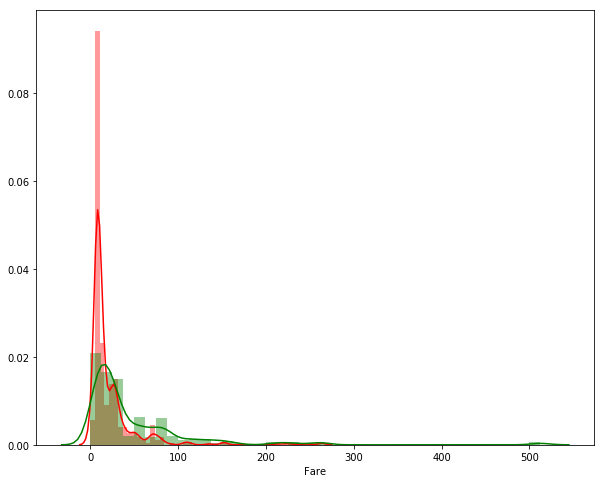

In [348]:
sns.distplot(df_train.loc[df_train.Survived==0, 'Fare'], color='r')
sns.distplot(df_train[df_train['Survived']==1]['Fare'], color='g')
plt.plot()
print(df_train.Fare.describe())

In [349]:
df_train.Fare = df_train.Fare.fillna(-0.5)
quant = (-1,0,8,15,31,600)
label_quants = ['NoInf', 'quant1', 'quant2', 'quant3', 'quant4']
df_train['Fare_cat'] = pd.cut(df_train.Fare, quant, labels=label_quants)
print(pd.crosstab(df_train.Fare_cat, df_train.Survived))
df_test['Fare_cat'] = pd.cut(df_test.Fare, quant, labels=label_quants)

Survived    0    1
Fare_cat          
NoInf      14    1
quant1    175   51
quant2    155   62
quant3    112   99
quant4     93  129


In [350]:
del df_train['Fare']
del df_train['Ticket']
del df_train['Age']
del df_train['Cabin']
del df_train['Name']

del df_test['Fare']
del df_test['Ticket']
del df_test['Age']
del df_test['Cabin']
del df_test['Name']
df_train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_cat,Fare_cat
PassengerId,,,,,,,,,
1,0,3,male,1,0,S,Mr,Student,quant1
2,1,1,female,1,0,C,Mrs,Adult,quant4
3,1,3,female,0,0,S,Miss,Young,quant1
4,1,1,female,1,0,S,Mrs,Young,quant4
5,0,3,male,0,0,S,Mr,Young,quant2


Survived    0    1
Sex               
female     81  233
male      468  109


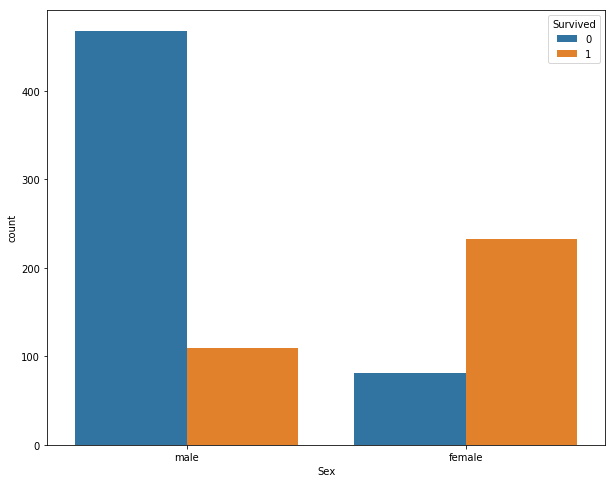

In [351]:
print(pd.crosstab(df_train.Sex, df_train.Survived))
sns.countplot(x='Sex', data=df_train, hue='Survived')
plt.show()

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217


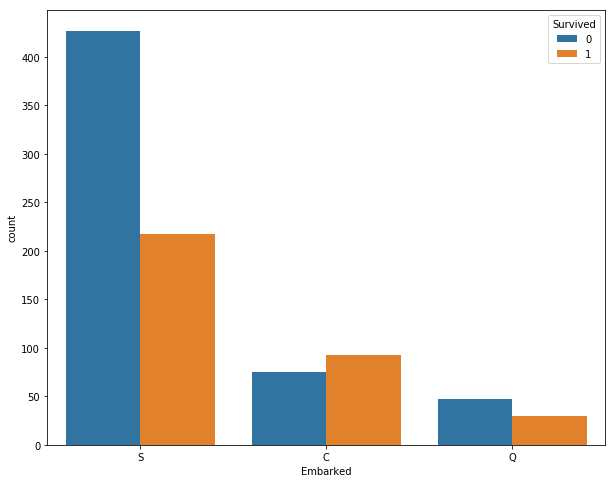

In [352]:
print(pd.crosstab(df_train.Embarked, df_train.Survived))
sns.countplot(x='Embarked', data=df_train, hue='Survived')
plt.show()
df_train.Embarked = df_train.Embarked.fillna('S')

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


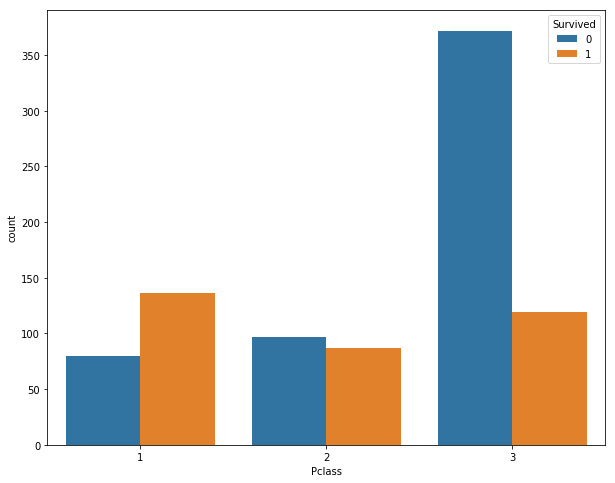

In [353]:
print(pd.crosstab(df_train.Pclass, df_train.Survived))
sns.countplot(x='Pclass', data=df_train, hue='Survived')
plt.show()

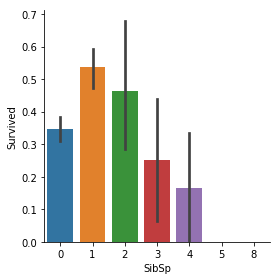

In [354]:
g = sns.factorplot(x='SibSp', y='Survived', data=df_train, kind='bar')


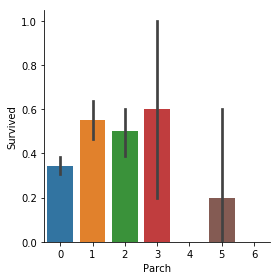

In [355]:
g = sns.factorplot(x='Parch', y='Survived', data=df_train, kind='bar')

Survived    0    1
FSize             
1         374  163
2          72   89
3          43   59
4           8   21
5          12    3
6          19    3
7           8    4
8           6    0
11          7    0


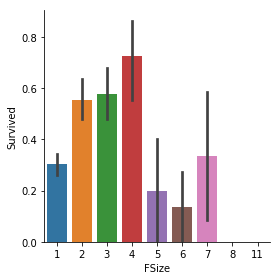

In [356]:
#family size = SibSp + Parch + 1
df_train['FSize'] = df_train['Parch'] + df_train['SibSp'] + 1
df_test['FSize'] = df_test['Parch'] + df_test['SibSp'] + 1
print(pd.crosstab(df_train.FSize, df_train.Survived))
g = sns.factorplot(x='FSize', y='Survived', data=df_train, kind='bar')

In [357]:
del df_train['SibSp']
del df_train['Parch']

del df_test['SibSp']
del df_test['Parch']
df_train.head()

,Survived,Pclass,Sex,Embarked,Title,Age_cat,Fare_cat,FSize
PassengerId,,,,,,,,
1,0,3,male,S,Mr,Student,quant1,2
2,1,1,female,C,Mrs,Adult,quant4,2
3,1,3,female,S,Miss,Young,quant1,1
4,1,1,female,S,Mrs,Young,quant4,2
5,0,3,male,S,Mr,Young,quant2,1


In [358]:
need_encoded = ['Sex', 'Embarked', 'Age_cat', 'Fare_cat', 'Title']
df_train = pd.get_dummies(df_train, columns=need_encoded,
                         prefix=need_encoded, drop_first=False)
df_test = pd.get_dummies(df_test, columns=need_encoded,
                         prefix=need_encoded, drop_first=False)

In [360]:
train = df_train.drop(['Survived'], axis=1)
label = df_train['Survived']
df_test['Title_Royalty'] = 0
print(train.columns)
print(df_test.columns)
x_train = train.values
y_train = label.values

x_test = df_test.values.astype(np.float64, copy=False)
# x_train.shape

Index(['Pclass', 'FSize', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Age_cat_babies', 'Age_cat_Children', 'Age_cat_Teen',
       'Age_cat_Student', 'Age_cat_Young', 'Age_cat_Adult', 'Age_cat_Senior',
       'Fare_cat_NoInf', 'Fare_cat_quant1', 'Fare_cat_quant2',
       'Fare_cat_quant3', 'Fare_cat_quant4', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty'],
      dtype='object')
Index(['Pclass', 'FSize', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Age_cat_babies', 'Age_cat_Children', 'Age_cat_Teen',
       'Age_cat_Student', 'Age_cat_Young', 'Age_cat_Adult', 'Age_cat_Senior',
       'Fare_cat_NoInf', 'Fare_cat_quant1', 'Fare_cat_quant2',
       'Fare_cat_quant3', 'Fare_cat_quant4', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty'],
      dtype='object')


In [377]:
model = Sequential()
model.add(Dense(input_dim=x_train.shape[-1], units=32,
                 kernel_initializer='normal', bias_initializer='zeros'))
model.add(Activation('relu'))
model.add(Dropout(.5))
model.add(Dense(units=16, kernel_initializer='normal', bias_initializer='zeros'))
model.add(Activation('relu'))
model.add(Dropout(.5))
model.add(Dense(units=1))
model.add(Activation('sigmoid'))
# used_optimizer = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [378]:
model.fit(x_train, y_train, batch_size = 128, epochs=1000, verbose=2)

Epoch 1/1000
 - 0s - loss: 5.2165 - acc: 0.4613
Epoch 2/1000
 - 0s - loss: 4.8007 - acc: 0.4725
Epoch 3/1000
 - 0s - loss: 4.6115 - acc: 0.4736
Epoch 4/1000
 - 0s - loss: 4.9279 - acc: 0.4669
Epoch 5/1000
 - 0s - loss: 4.5122 - acc: 0.4781
Epoch 6/1000
 - 0s - loss: 4.1008 - acc: 0.5028
Epoch 7/1000
 - 0s - loss: 4.1372 - acc: 0.4983
Epoch 8/1000
 - 0s - loss: 4.0254 - acc: 0.5174
Epoch 9/1000
 - 0s - loss: 3.6011 - acc: 0.5230
Epoch 10/1000
 - 0s - loss: 3.7453 - acc: 0.5443
Epoch 11/1000
 - 0s - loss: 3.7337 - acc: 0.5208
Epoch 12/1000
 - 0s - loss: 3.0640 - acc: 0.5511
Epoch 13/1000
 - 0s - loss: 3.3450 - acc: 0.5264
Epoch 14/1000
 - 0s - loss: 3.3006 - acc: 0.5286
Epoch 15/1000
 - 0s - loss: 2.9810 - acc: 0.5354
Epoch 16/1000
 - 0s - loss: 2.8417 - acc: 0.5365
Epoch 17/1000
 - 0s - loss: 2.8652 - acc: 0.5320
Epoch 18/1000
 - 0s - loss: 2.5791 - acc: 0.5612
Epoch 19/1000
 - 0s - loss: 2.5443 - acc: 0.5286
Epoch 20/1000
 - 0s - loss: 2.3452 - acc: 0.5443
Epoch 21/1000
 - 0s - loss: 2

 - 0s - loss: 0.5645 - acc: 0.7239
Epoch 168/1000
 - 0s - loss: 0.5465 - acc: 0.7374
Epoch 169/1000
 - 0s - loss: 0.5560 - acc: 0.7306
Epoch 170/1000
 - 0s - loss: 0.5392 - acc: 0.7329
Epoch 171/1000
 - 0s - loss: 0.5395 - acc: 0.7295
Epoch 172/1000
 - 0s - loss: 0.5480 - acc: 0.7351
Epoch 173/1000
 - 0s - loss: 0.5354 - acc: 0.7374
Epoch 174/1000
 - 0s - loss: 0.5470 - acc: 0.7363
Epoch 175/1000
 - 0s - loss: 0.5565 - acc: 0.7194
Epoch 176/1000
 - 0s - loss: 0.5517 - acc: 0.7306
Epoch 177/1000
 - 0s - loss: 0.5533 - acc: 0.7407
Epoch 178/1000
 - 0s - loss: 0.5444 - acc: 0.7565
Epoch 179/1000
 - 0s - loss: 0.5512 - acc: 0.7430
Epoch 180/1000
 - 0s - loss: 0.5527 - acc: 0.7385
Epoch 181/1000
 - 0s - loss: 0.5538 - acc: 0.7363
Epoch 182/1000
 - 0s - loss: 0.5444 - acc: 0.7374
Epoch 183/1000
 - 0s - loss: 0.5395 - acc: 0.7464
Epoch 184/1000
 - 0s - loss: 0.5549 - acc: 0.7329
Epoch 185/1000
 - 0s - loss: 0.5317 - acc: 0.7250
Epoch 186/1000
 - 0s - loss: 0.5271 - acc: 0.7598
Epoch 187/1000


 - 0s - loss: 0.4777 - acc: 0.7699
Epoch 332/1000
 - 0s - loss: 0.4799 - acc: 0.7789
Epoch 333/1000
 - 0s - loss: 0.4969 - acc: 0.7789
Epoch 334/1000
 - 0s - loss: 0.4954 - acc: 0.7744
Epoch 335/1000
 - 0s - loss: 0.4807 - acc: 0.7935
Epoch 336/1000
 - 0s - loss: 0.4868 - acc: 0.7733
Epoch 337/1000
 - 0s - loss: 0.4830 - acc: 0.7901
Epoch 338/1000
 - 0s - loss: 0.4753 - acc: 0.7845
Epoch 339/1000
 - 0s - loss: 0.4819 - acc: 0.7722
Epoch 340/1000
 - 0s - loss: 0.5064 - acc: 0.7699
Epoch 341/1000
 - 0s - loss: 0.5037 - acc: 0.7789
Epoch 342/1000
 - 0s - loss: 0.4899 - acc: 0.7946
Epoch 343/1000
 - 0s - loss: 0.4877 - acc: 0.7868
Epoch 344/1000
 - 0s - loss: 0.4790 - acc: 0.7946
Epoch 345/1000
 - 0s - loss: 0.4966 - acc: 0.7879
Epoch 346/1000
 - 0s - loss: 0.4970 - acc: 0.7800
Epoch 347/1000
 - 0s - loss: 0.5119 - acc: 0.7710
Epoch 348/1000
 - 0s - loss: 0.4857 - acc: 0.7823
Epoch 349/1000
 - 0s - loss: 0.4911 - acc: 0.7767
Epoch 350/1000
 - 0s - loss: 0.4925 - acc: 0.7744
Epoch 351/1000


Epoch 496/1000
 - 0s - loss: 0.4718 - acc: 0.7946
Epoch 497/1000
 - 0s - loss: 0.4575 - acc: 0.8058
Epoch 498/1000
 - 0s - loss: 0.4506 - acc: 0.8070
Epoch 499/1000
 - 0s - loss: 0.4698 - acc: 0.8047
Epoch 500/1000
 - 0s - loss: 0.4515 - acc: 0.8058
Epoch 501/1000
 - 0s - loss: 0.4476 - acc: 0.8126
Epoch 502/1000
 - 0s - loss: 0.4659 - acc: 0.7980
Epoch 503/1000
 - 0s - loss: 0.4385 - acc: 0.8081
Epoch 504/1000
 - 0s - loss: 0.4493 - acc: 0.8193
Epoch 505/1000
 - 0s - loss: 0.4475 - acc: 0.8215
Epoch 506/1000
 - 0s - loss: 0.4675 - acc: 0.7901
Epoch 507/1000
 - 0s - loss: 0.4645 - acc: 0.8025
Epoch 508/1000
 - 0s - loss: 0.4585 - acc: 0.8114
Epoch 509/1000
 - 0s - loss: 0.4565 - acc: 0.7991
Epoch 510/1000
 - 0s - loss: 0.4608 - acc: 0.8114
Epoch 511/1000
 - 0s - loss: 0.4521 - acc: 0.8013
Epoch 512/1000
 - 0s - loss: 0.4476 - acc: 0.8036
Epoch 513/1000
 - 0s - loss: 0.4449 - acc: 0.8159
Epoch 514/1000
 - 0s - loss: 0.4628 - acc: 0.8002
Epoch 515/1000
 - 0s - loss: 0.4493 - acc: 0.8148


Epoch 660/1000
 - 0s - loss: 0.4380 - acc: 0.8339
Epoch 661/1000
 - 0s - loss: 0.4220 - acc: 0.8316
Epoch 662/1000
 - 0s - loss: 0.4486 - acc: 0.8025
Epoch 663/1000
 - 0s - loss: 0.4390 - acc: 0.8249
Epoch 664/1000
 - 0s - loss: 0.4239 - acc: 0.8137
Epoch 665/1000
 - 0s - loss: 0.4359 - acc: 0.8193
Epoch 666/1000
 - 0s - loss: 0.4331 - acc: 0.8204
Epoch 667/1000
 - 0s - loss: 0.4291 - acc: 0.8339
Epoch 668/1000
 - 0s - loss: 0.4328 - acc: 0.8260
Epoch 669/1000
 - 0s - loss: 0.4468 - acc: 0.8036
Epoch 670/1000
 - 0s - loss: 0.4266 - acc: 0.8249
Epoch 671/1000
 - 0s - loss: 0.4380 - acc: 0.8159
Epoch 672/1000
 - 0s - loss: 0.3986 - acc: 0.8294
Epoch 673/1000
 - 0s - loss: 0.4364 - acc: 0.8148
Epoch 674/1000
 - 0s - loss: 0.4271 - acc: 0.8148
Epoch 675/1000
 - 0s - loss: 0.4366 - acc: 0.8159
Epoch 676/1000
 - 0s - loss: 0.4510 - acc: 0.8092
Epoch 677/1000
 - 0s - loss: 0.4374 - acc: 0.8148
Epoch 678/1000
 - 0s - loss: 0.4195 - acc: 0.8193
Epoch 679/1000
 - 0s - loss: 0.4391 - acc: 0.8227


Epoch 824/1000
 - 0s - loss: 0.4037 - acc: 0.8361
Epoch 825/1000
 - 0s - loss: 0.4153 - acc: 0.8384
Epoch 826/1000
 - 0s - loss: 0.4211 - acc: 0.8328
Epoch 827/1000
 - 0s - loss: 0.4077 - acc: 0.8283
Epoch 828/1000
 - 0s - loss: 0.4487 - acc: 0.8283
Epoch 829/1000
 - 0s - loss: 0.4106 - acc: 0.8395
Epoch 830/1000
 - 0s - loss: 0.4256 - acc: 0.8272
Epoch 831/1000
 - 0s - loss: 0.4287 - acc: 0.8204
Epoch 832/1000
 - 0s - loss: 0.4240 - acc: 0.8305
Epoch 833/1000
 - 0s - loss: 0.4202 - acc: 0.8294
Epoch 834/1000
 - 0s - loss: 0.4231 - acc: 0.8283
Epoch 835/1000
 - 0s - loss: 0.4140 - acc: 0.8294
Epoch 836/1000
 - 0s - loss: 0.4360 - acc: 0.8238
Epoch 837/1000
 - 0s - loss: 0.4193 - acc: 0.8305
Epoch 838/1000
 - 0s - loss: 0.4259 - acc: 0.8328
Epoch 839/1000
 - 0s - loss: 0.4201 - acc: 0.8238
Epoch 840/1000
 - 0s - loss: 0.4199 - acc: 0.8418
Epoch 841/1000
 - 0s - loss: 0.4317 - acc: 0.8283
Epoch 842/1000
 - 0s - loss: 0.3974 - acc: 0.8350
Epoch 843/1000
 - 0s - loss: 0.4143 - acc: 0.8350


Epoch 988/1000
 - 0s - loss: 0.4144 - acc: 0.8294
Epoch 989/1000
 - 0s - loss: 0.4025 - acc: 0.8272
Epoch 990/1000
 - 0s - loss: 0.4177 - acc: 0.8260
Epoch 991/1000
 - 0s - loss: 0.3959 - acc: 0.8373
Epoch 992/1000
 - 0s - loss: 0.4061 - acc: 0.8373
Epoch 993/1000
 - 0s - loss: 0.4257 - acc: 0.8283
Epoch 994/1000
 - 0s - loss: 0.4156 - acc: 0.8429
Epoch 995/1000
 - 0s - loss: 0.3864 - acc: 0.8373
Epoch 996/1000
 - 0s - loss: 0.4082 - acc: 0.8249
Epoch 997/1000
 - 0s - loss: 0.4235 - acc: 0.8316
Epoch 998/1000
 - 0s - loss: 0.4208 - acc: 0.8305
Epoch 999/1000
 - 0s - loss: 0.4038 - acc: 0.8418
Epoch 1000/1000
 - 0s - loss: 0.4085 - acc: 0.8395


In [379]:
scores = model.evaluate(x_train, y_train, batch_size=32)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

891/891 [==============================]891/891 [==============================] - 0s 160us/step

acc: 86.31%


In [380]:
history = model.fit(x_train, y_train, validation_split=0.1, epochs=1000, batch_size=64, verbose=2)

Train on 801 samples, validate on 90 samples
Epoch 1/1000
 - 0s - loss: 0.4183 - acc: 0.8190 - val_loss: 0.3014 - val_acc: 0.8889
Epoch 2/1000
 - 0s - loss: 0.4361 - acc: 0.8340 - val_loss: 0.3016 - val_acc: 0.8889
Epoch 3/1000
 - 0s - loss: 0.4201 - acc: 0.8340 - val_loss: 0.3041 - val_acc: 0.8778
Epoch 4/1000
 - 0s - loss: 0.4206 - acc: 0.8414 - val_loss: 0.3032 - val_acc: 0.8778
Epoch 5/1000
 - 0s - loss: 0.4083 - acc: 0.8315 - val_loss: 0.3023 - val_acc: 0.8778
Epoch 6/1000
 - 0s - loss: 0.4113 - acc: 0.8315 - val_loss: 0.2994 - val_acc: 0.8778
Epoch 7/1000
 - 0s - loss: 0.4017 - acc: 0.8427 - val_loss: 0.2990 - val_acc: 0.8778
Epoch 8/1000
 - 0s - loss: 0.4097 - acc: 0.8227 - val_loss: 0.2991 - val_acc: 0.8778
Epoch 9/1000
 - 0s - loss: 0.4094 - acc: 0.8302 - val_loss: 0.2996 - val_acc: 0.8889
Epoch 10/1000
 - 0s - loss: 0.4066 - acc: 0.8302 - val_loss: 0.3002 - val_acc: 0.8778
Epoch 11/1000
 - 0s - loss: 0.4266 - acc: 0.8365 - val_loss: 0.2999 - val_acc: 0.8778
Epoch 12/1000
 - 0

Epoch 96/1000
 - 0s - loss: 0.3930 - acc: 0.8402 - val_loss: 0.3158 - val_acc: 0.8667
Epoch 97/1000
 - 0s - loss: 0.4110 - acc: 0.8352 - val_loss: 0.3136 - val_acc: 0.8667
Epoch 98/1000
 - 0s - loss: 0.4004 - acc: 0.8377 - val_loss: 0.3112 - val_acc: 0.8667
Epoch 99/1000
 - 0s - loss: 0.4003 - acc: 0.8302 - val_loss: 0.3112 - val_acc: 0.8667
Epoch 100/1000
 - 0s - loss: 0.3884 - acc: 0.8390 - val_loss: 0.3108 - val_acc: 0.8556
Epoch 101/1000
 - 0s - loss: 0.4061 - acc: 0.8365 - val_loss: 0.3123 - val_acc: 0.8556
Epoch 102/1000
 - 0s - loss: 0.3949 - acc: 0.8365 - val_loss: 0.3118 - val_acc: 0.8556
Epoch 103/1000
 - 0s - loss: 0.4317 - acc: 0.8252 - val_loss: 0.3125 - val_acc: 0.8556
Epoch 104/1000
 - 0s - loss: 0.4093 - acc: 0.8315 - val_loss: 0.3136 - val_acc: 0.8556
Epoch 105/1000
 - 0s - loss: 0.3843 - acc: 0.8414 - val_loss: 0.3103 - val_acc: 0.8556
Epoch 106/1000
 - 0s - loss: 0.4129 - acc: 0.8352 - val_loss: 0.3125 - val_acc: 0.8556
Epoch 107/1000
 - 0s - loss: 0.4007 - acc: 0.84

Epoch 191/1000
 - 0s - loss: 0.4024 - acc: 0.8439 - val_loss: 0.3157 - val_acc: 0.8556
Epoch 192/1000
 - 0s - loss: 0.3829 - acc: 0.8439 - val_loss: 0.3130 - val_acc: 0.8556
Epoch 193/1000
 - 0s - loss: 0.3856 - acc: 0.8489 - val_loss: 0.3122 - val_acc: 0.8556
Epoch 194/1000
 - 0s - loss: 0.4305 - acc: 0.8352 - val_loss: 0.3155 - val_acc: 0.8556
Epoch 195/1000
 - 0s - loss: 0.4047 - acc: 0.8302 - val_loss: 0.3141 - val_acc: 0.8556
Epoch 196/1000
 - 0s - loss: 0.4102 - acc: 0.8302 - val_loss: 0.3175 - val_acc: 0.8556
Epoch 197/1000
 - 0s - loss: 0.3940 - acc: 0.8439 - val_loss: 0.3153 - val_acc: 0.8556
Epoch 198/1000
 - 0s - loss: 0.4125 - acc: 0.8340 - val_loss: 0.3171 - val_acc: 0.8556
Epoch 199/1000
 - 0s - loss: 0.4058 - acc: 0.8340 - val_loss: 0.3186 - val_acc: 0.8556
Epoch 200/1000
 - 0s - loss: 0.4078 - acc: 0.8402 - val_loss: 0.3171 - val_acc: 0.8556
Epoch 201/1000
 - 0s - loss: 0.3854 - acc: 0.8502 - val_loss: 0.3152 - val_acc: 0.8556
Epoch 202/1000
 - 0s - loss: 0.4095 - acc: 

 - 0s - loss: 0.4157 - acc: 0.8427 - val_loss: 0.3248 - val_acc: 0.8556
Epoch 286/1000
 - 0s - loss: 0.3938 - acc: 0.8539 - val_loss: 0.3242 - val_acc: 0.8556
Epoch 287/1000
 - 0s - loss: 0.4051 - acc: 0.8327 - val_loss: 0.3258 - val_acc: 0.8556
Epoch 288/1000
 - 0s - loss: 0.3948 - acc: 0.8477 - val_loss: 0.3269 - val_acc: 0.8556
Epoch 289/1000
 - 0s - loss: 0.3996 - acc: 0.8365 - val_loss: 0.3245 - val_acc: 0.8556
Epoch 290/1000
 - 0s - loss: 0.4168 - acc: 0.8464 - val_loss: 0.3238 - val_acc: 0.8556
Epoch 291/1000
 - 0s - loss: 0.3880 - acc: 0.8427 - val_loss: 0.3227 - val_acc: 0.8556
Epoch 292/1000
 - 0s - loss: 0.4121 - acc: 0.8452 - val_loss: 0.3230 - val_acc: 0.8556
Epoch 293/1000
 - 0s - loss: 0.3922 - acc: 0.8439 - val_loss: 0.3215 - val_acc: 0.8556
Epoch 294/1000
 - 0s - loss: 0.3998 - acc: 0.8452 - val_loss: 0.3222 - val_acc: 0.8556
Epoch 295/1000
 - 0s - loss: 0.3962 - acc: 0.8402 - val_loss: 0.3241 - val_acc: 0.8556
Epoch 296/1000
 - 0s - loss: 0.4152 - acc: 0.8315 - val_lo

Epoch 380/1000
 - 0s - loss: 0.3925 - acc: 0.8439 - val_loss: 0.3271 - val_acc: 0.8556
Epoch 381/1000
 - 0s - loss: 0.3996 - acc: 0.8589 - val_loss: 0.3261 - val_acc: 0.8556
Epoch 382/1000
 - 0s - loss: 0.4185 - acc: 0.8352 - val_loss: 0.3273 - val_acc: 0.8556
Epoch 383/1000
 - 0s - loss: 0.4049 - acc: 0.8377 - val_loss: 0.3277 - val_acc: 0.8556
Epoch 384/1000
 - 0s - loss: 0.3963 - acc: 0.8414 - val_loss: 0.3252 - val_acc: 0.8556
Epoch 385/1000
 - 0s - loss: 0.4115 - acc: 0.8514 - val_loss: 0.3263 - val_acc: 0.8556
Epoch 386/1000
 - 0s - loss: 0.4001 - acc: 0.8427 - val_loss: 0.3277 - val_acc: 0.8556
Epoch 387/1000
 - 0s - loss: 0.4026 - acc: 0.8427 - val_loss: 0.3292 - val_acc: 0.8556
Epoch 388/1000
 - 0s - loss: 0.4012 - acc: 0.8477 - val_loss: 0.3270 - val_acc: 0.8556
Epoch 389/1000
 - 0s - loss: 0.4089 - acc: 0.8464 - val_loss: 0.3288 - val_acc: 0.8556
Epoch 390/1000
 - 0s - loss: 0.4114 - acc: 0.8365 - val_loss: 0.3274 - val_acc: 0.8556
Epoch 391/1000
 - 0s - loss: 0.3872 - acc: 

 - 0s - loss: 0.3774 - acc: 0.8489 - val_loss: 0.3265 - val_acc: 0.8556
Epoch 475/1000
 - 0s - loss: 0.3675 - acc: 0.8489 - val_loss: 0.3275 - val_acc: 0.8556
Epoch 476/1000
 - 0s - loss: 0.3852 - acc: 0.8527 - val_loss: 0.3269 - val_acc: 0.8556
Epoch 477/1000
 - 0s - loss: 0.3896 - acc: 0.8614 - val_loss: 0.3275 - val_acc: 0.8556
Epoch 478/1000
 - 0s - loss: 0.3884 - acc: 0.8527 - val_loss: 0.3254 - val_acc: 0.8556
Epoch 479/1000
 - 0s - loss: 0.3934 - acc: 0.8552 - val_loss: 0.3266 - val_acc: 0.8556
Epoch 480/1000
 - 0s - loss: 0.3960 - acc: 0.8327 - val_loss: 0.3234 - val_acc: 0.8556
Epoch 481/1000
 - 0s - loss: 0.3648 - acc: 0.8514 - val_loss: 0.3225 - val_acc: 0.8556
Epoch 482/1000
 - 0s - loss: 0.3862 - acc: 0.8539 - val_loss: 0.3258 - val_acc: 0.8556
Epoch 483/1000
 - 0s - loss: 0.3916 - acc: 0.8589 - val_loss: 0.3268 - val_acc: 0.8556
Epoch 484/1000
 - 0s - loss: 0.4001 - acc: 0.8464 - val_loss: 0.3257 - val_acc: 0.8556
Epoch 485/1000
 - 0s - loss: 0.3955 - acc: 0.8452 - val_lo

Epoch 569/1000
 - 0s - loss: 0.3872 - acc: 0.8427 - val_loss: 0.3249 - val_acc: 0.8556
Epoch 570/1000
 - 0s - loss: 0.3774 - acc: 0.8390 - val_loss: 0.3261 - val_acc: 0.8556
Epoch 571/1000
 - 0s - loss: 0.3835 - acc: 0.8464 - val_loss: 0.3279 - val_acc: 0.8556
Epoch 572/1000
 - 0s - loss: 0.4080 - acc: 0.8539 - val_loss: 0.3261 - val_acc: 0.8556
Epoch 573/1000
 - 0s - loss: 0.3759 - acc: 0.8564 - val_loss: 0.3271 - val_acc: 0.8556
Epoch 574/1000
 - 0s - loss: 0.3949 - acc: 0.8539 - val_loss: 0.3271 - val_acc: 0.8556
Epoch 575/1000
 - 0s - loss: 0.3925 - acc: 0.8452 - val_loss: 0.3286 - val_acc: 0.8556
Epoch 576/1000
 - 0s - loss: 0.3898 - acc: 0.8514 - val_loss: 0.3256 - val_acc: 0.8556
Epoch 577/1000
 - 0s - loss: 0.3778 - acc: 0.8489 - val_loss: 0.3240 - val_acc: 0.8556
Epoch 578/1000
 - 0s - loss: 0.4055 - acc: 0.8427 - val_loss: 0.3253 - val_acc: 0.8556
Epoch 579/1000
 - 0s - loss: 0.4075 - acc: 0.8414 - val_loss: 0.3273 - val_acc: 0.8556
Epoch 580/1000
 - 0s - loss: 0.4065 - acc: 

 - 0s - loss: 0.3592 - acc: 0.8552 - val_loss: 0.3256 - val_acc: 0.8556
Epoch 664/1000
 - 0s - loss: 0.3793 - acc: 0.8377 - val_loss: 0.3256 - val_acc: 0.8556
Epoch 665/1000
 - 0s - loss: 0.3891 - acc: 0.8602 - val_loss: 0.3259 - val_acc: 0.8556
Epoch 666/1000
 - 0s - loss: 0.3958 - acc: 0.8627 - val_loss: 0.3279 - val_acc: 0.8556
Epoch 667/1000
 - 0s - loss: 0.3933 - acc: 0.8439 - val_loss: 0.3247 - val_acc: 0.8556
Epoch 668/1000
 - 0s - loss: 0.3954 - acc: 0.8639 - val_loss: 0.3241 - val_acc: 0.8556
Epoch 669/1000
 - 0s - loss: 0.3853 - acc: 0.8502 - val_loss: 0.3241 - val_acc: 0.8556
Epoch 670/1000
 - 0s - loss: 0.3734 - acc: 0.8414 - val_loss: 0.3242 - val_acc: 0.8556
Epoch 671/1000
 - 0s - loss: 0.3703 - acc: 0.8577 - val_loss: 0.3243 - val_acc: 0.8556
Epoch 672/1000
 - 0s - loss: 0.3795 - acc: 0.8427 - val_loss: 0.3252 - val_acc: 0.8556
Epoch 673/1000
 - 0s - loss: 0.3704 - acc: 0.8627 - val_loss: 0.3246 - val_acc: 0.8556
Epoch 674/1000
 - 0s - loss: 0.3825 - acc: 0.8452 - val_lo

Epoch 758/1000
 - 0s - loss: 0.3876 - acc: 0.8577 - val_loss: 0.3261 - val_acc: 0.8444
Epoch 759/1000
 - 0s - loss: 0.3822 - acc: 0.8527 - val_loss: 0.3258 - val_acc: 0.8444
Epoch 760/1000
 - 0s - loss: 0.3822 - acc: 0.8452 - val_loss: 0.3256 - val_acc: 0.8444
Epoch 761/1000
 - 0s - loss: 0.3911 - acc: 0.8527 - val_loss: 0.3242 - val_acc: 0.8444
Epoch 762/1000
 - 0s - loss: 0.3845 - acc: 0.8427 - val_loss: 0.3252 - val_acc: 0.8444
Epoch 763/1000
 - 0s - loss: 0.3746 - acc: 0.8539 - val_loss: 0.3232 - val_acc: 0.8444
Epoch 764/1000
 - 0s - loss: 0.3777 - acc: 0.8477 - val_loss: 0.3241 - val_acc: 0.8444
Epoch 765/1000
 - 0s - loss: 0.3846 - acc: 0.8514 - val_loss: 0.3246 - val_acc: 0.8444
Epoch 766/1000
 - 0s - loss: 0.3800 - acc: 0.8489 - val_loss: 0.3252 - val_acc: 0.8444
Epoch 767/1000
 - 0s - loss: 0.3822 - acc: 0.8539 - val_loss: 0.3248 - val_acc: 0.8444
Epoch 768/1000
 - 0s - loss: 0.3993 - acc: 0.8489 - val_loss: 0.3256 - val_acc: 0.8444
Epoch 769/1000
 - 0s - loss: 0.3770 - acc: 

 - 0s - loss: 0.3866 - acc: 0.8452 - val_loss: 0.3290 - val_acc: 0.8444
Epoch 853/1000
 - 0s - loss: 0.3768 - acc: 0.8527 - val_loss: 0.3294 - val_acc: 0.8444
Epoch 854/1000
 - 0s - loss: 0.3954 - acc: 0.8502 - val_loss: 0.3303 - val_acc: 0.8444
Epoch 855/1000
 - 0s - loss: 0.3952 - acc: 0.8552 - val_loss: 0.3305 - val_acc: 0.8444
Epoch 856/1000
 - 0s - loss: 0.3892 - acc: 0.8564 - val_loss: 0.3297 - val_acc: 0.8444
Epoch 857/1000
 - 0s - loss: 0.4009 - acc: 0.8439 - val_loss: 0.3284 - val_acc: 0.8444
Epoch 858/1000
 - 0s - loss: 0.3693 - acc: 0.8477 - val_loss: 0.3284 - val_acc: 0.8444
Epoch 859/1000
 - 0s - loss: 0.3766 - acc: 0.8577 - val_loss: 0.3288 - val_acc: 0.8444
Epoch 860/1000
 - 0s - loss: 0.3915 - acc: 0.8502 - val_loss: 0.3274 - val_acc: 0.8444
Epoch 861/1000
 - 0s - loss: 0.3967 - acc: 0.8452 - val_loss: 0.3280 - val_acc: 0.8333
Epoch 862/1000
 - 0s - loss: 0.3676 - acc: 0.8564 - val_loss: 0.3281 - val_acc: 0.8444
Epoch 863/1000
 - 0s - loss: 0.3798 - acc: 0.8402 - val_lo

Epoch 947/1000
 - 0s - loss: 0.3888 - acc: 0.8439 - val_loss: 0.3304 - val_acc: 0.8444
Epoch 948/1000
 - 0s - loss: 0.3923 - acc: 0.8627 - val_loss: 0.3280 - val_acc: 0.8444
Epoch 949/1000
 - 0s - loss: 0.3717 - acc: 0.8552 - val_loss: 0.3293 - val_acc: 0.8444
Epoch 950/1000
 - 0s - loss: 0.3808 - acc: 0.8439 - val_loss: 0.3275 - val_acc: 0.8444
Epoch 951/1000
 - 0s - loss: 0.3817 - acc: 0.8489 - val_loss: 0.3292 - val_acc: 0.8444
Epoch 952/1000
 - 0s - loss: 0.3775 - acc: 0.8502 - val_loss: 0.3299 - val_acc: 0.8444
Epoch 953/1000
 - 0s - loss: 0.3774 - acc: 0.8652 - val_loss: 0.3293 - val_acc: 0.8444
Epoch 954/1000
 - 0s - loss: 0.3782 - acc: 0.8489 - val_loss: 0.3279 - val_acc: 0.8444
Epoch 955/1000
 - 0s - loss: 0.3823 - acc: 0.8527 - val_loss: 0.3268 - val_acc: 0.8444
Epoch 956/1000
 - 0s - loss: 0.3888 - acc: 0.8464 - val_loss: 0.3273 - val_acc: 0.8444
Epoch 957/1000
 - 0s - loss: 0.3796 - acc: 0.8477 - val_loss: 0.3282 - val_acc: 0.8444
Epoch 958/1000
 - 0s - loss: 0.3763 - acc: 

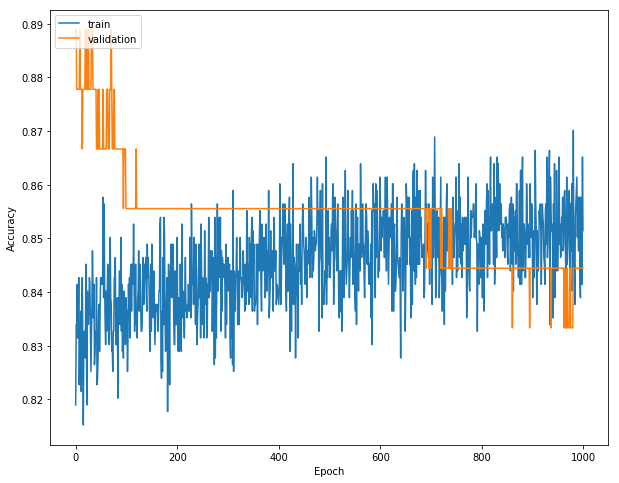

In [381]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

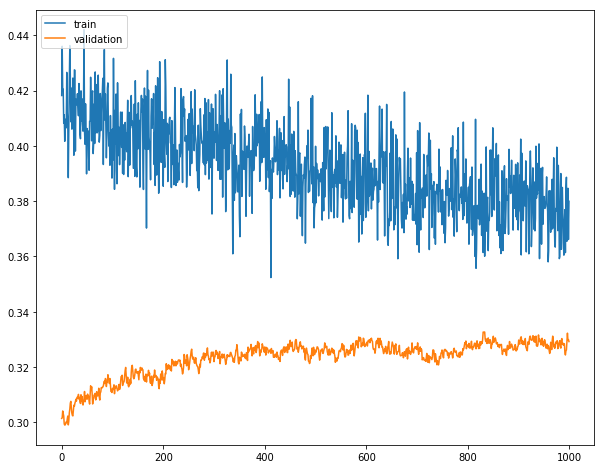

In [382]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [383]:
y_pred = model.predict(x_test)

y_pred_cls = np.round(y_pred).flatten()
# print(y_pred_cls)
my_submission = pd.DataFrame({'PassengerId': df_test.index, 'Survived': y_pred_cls.astype(int)})
my_submission.to_csv('submission.csv', index=False)

In [ ]:
# def preprocess_data(df_all):
#     mean_age = np.round(np.mean(df_full['Age']))
#     df_all['Age'].fillna(mean_age)
#     df_all['Cabin'].fillna('Z', inplace=True)
#     df_all['Embarked'].fillna('S', inplace=True)
#     df_all = pd.get_dummies(df_all, columns=['Pclass', 'Sex', 'Embarked', 'Cabin'])
#     df_all = df_all.drop(['Name', 'Ticket', 'Fare'], axis=1)
#     return df_all

In [ ]:
# proc_data = preprocess_data(df_all)
# proc_data_train = proc_data[proc_data['is_train'] == True]
# print("Size of training set: {}".format(len(proc_data_train)))
# proc_data_test = proc_data[proc_data['is_train'] == False]
# print("Size of testing set: {}".format(len(proc_data_test)))

In [ ]:
# model = Sequential()
# model.add(Dense(input_dim=proc_data_train.shape[-1], units=32,
#                  kernel_initializer='normal', bias_initializer='zeros'))
# model.add(Activation('relu'))
# model.add(Dense(units=16, kernel_initializer='normal', bias_initializer='zeros'))
# model.add(Activation('relu'))
# # model.add(Dropout(.5))
# model.add(Dense(units=2))
# model.add(Activation('softmax'))

# model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
# feature_size = df_train.shape[-1]
# from tensorflow.python.keras import Sequential
# def create_model():
#     model = Sequential()
#     model.add(Dense(32, input_shape=(feature_size,), kernel_initializer='normal', activation=None, name='posts'))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     model.add(Dense(4,input_dim=32, activation=None))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     model.add(Dense(1, input_dim=4, activation=None))
#     model.add(BatchNormalization())
#     model.add(Activation('sigmoid'))
#     model.compile(optimizer=tf.keras.optimizers.RMSprop(), 
#                   loss='binary_crossentropy', metrics=['accuracy'])
#     return model

In [ ]:
# model.fit(proc_data_train.values, y_train.values, batch_size=64, epochs=20, shuffle=True, verbose=2)

In [268]:
# preds = model.predict_classes(df_test)
# preds
# preds = np.round(preds).flatten()
# my_submission = pd.DataFrame({'PassengerId': df_test.index, 'Survived': preds.astype(int)})
# my_submission.to_csv('submission.csv', index=False)

ValueError: Error when checking : expected dense_1_input to have shape (25,) but got array with shape (24,)

In [373]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                416       
_________________________________________________________________
activation_7 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 12)                204       
_________________________________________________________________
activation_8 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 13        
_________________________________________________________________
activation_9 (Activation)    (None, 1)                 0         
Total params: 633
Trainable params: 633
Non-trainable params: 0
_________________________________________________________________
